In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import pickle
import numpy as np
import matplotlib.pyplot as plt
import time

# Loading and preprocessing the data 

In [18]:
X = pickle.load(open("X_pickle", "rb"))
y = pickle.load(open("y_pickle", "rb"))

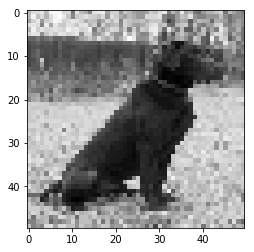

In [19]:
plt.imshow(X[50], cmap = 'gray')
plt.show()

In [20]:
X[0]

array([[120, 122, 118, ..., 111, 115, 107],
       [138, 137, 138, ..., 123, 118, 109],
       [140, 144, 142, ..., 120, 130, 128],
       ...,
       [ 46, 134, 102, ..., 149, 145, 145],
       [ 76, 108, 124, ..., 155, 157, 150],
       [ 81, 130, 150, ..., 139, 149, 142]], dtype=uint8)

In [21]:
X[0].shape

(50, 50)

In [22]:
np.expand_dims(X[0],axis=3).shape

c:\users\carlisson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """Entry point for launching an IPython kernel.


(50, 50, 1)

In [23]:
#X = np.expand_dims(X,axis=3)
IMG_SIZE = 50
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X = X / 255.0 # Normalizing the features 

In [24]:
X[0].shape

(50, 50, 1)

In [25]:
y = to_categorical(y) # 10 classes 

In [26]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

# Creating the Model

In [27]:
dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

In [28]:
for i in dense_layers:
    for j in layer_sizes:
        for k in conv_layers:
            NAME = "Cats-vs-dog-cnn-62x2-{}".format(int(time.time()))
            tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(j , (3,3), input_shape = X.shape[1:]))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))

            for l in range(k-1):
                model.add(Conv2D(j , (3,3) ) )
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Flatten())

            for l in range(i):
                model.add(Dense(j))
                model.add(Activation("relu"))

            model.add(Dense(2))
            model.add(Activation('sigmoid'))

            model.compile(loss="binary_crossentropy",
                         optimizer = "adam",
                         metrics=['accuracy'])

            model.fit(X, y, batch_size=32, epochs = 10 , validation_split=0.3,
                      callbacks=[tensorboard])


Cats-vs-dog-cnn-62x2-1596826997
Epoch 1/10
219/219 [==============================] - 28s 126ms/step - loss: 0.6836 - accuracy: 0.5435 - val_loss: 0.6698 - val_accuracy: 0.5809
Epoch 2/10
219/219 [==============================] - 25s 113ms/step - loss: 0.6347 - accuracy: 0.6439 - val_loss: 0.6202 - val_accuracy: 0.6667
Epoch 3/10
219/219 [==============================] - 26s 120ms/step - loss: 0.5967 - accuracy: 0.6829 - val_loss: 0.5977 - val_accuracy: 0.6854
Epoch 4/10
219/219 [==============================] - 27s 122ms/step - loss: 0.5575 - accuracy: 0.7164 - val_loss: 0.5647 - val_accuracy: 0.7057
Epoch 5/10
219/219 [==============================] - 27s 122ms/step - loss: 0.5194 - accuracy: 0.7447 - val_loss: 0.5201 - val_accuracy: 0.7471
Epoch 6/10
219/219 [==============================] - 28s 126ms/step - loss: 0.4857 - accuracy: 0.7654 - val_loss: 0.5129 - val_accuracy: 0.7471
Epoch 7/10
219/219 [==============================] - 31s 140ms/step - loss: 0.4564 - accuracy: 0.

#### Testing the Model and saving it

In [32]:
predictions = model.predict(X)

In [33]:
predictions[0]

array([0.94078594, 0.06953982], dtype=float32)

In [34]:
np.argmax(predictions[0])

0

In [35]:
y_pred_matriz = [np.argmax(t) for t in predictions]

In [36]:
y_pred_matriz[2:20]

[1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1]

In [37]:
y_matriz = [np.argmax(t) for t in y]

In [38]:
y_matriz[2:20]

[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(y_pred_matriz, y_matriz)

array([[4350, 1133],
       [ 647, 3859]], dtype=int64)

In [41]:
model.save('Model_DogCat-CNN.model')

INFO:tensorflow:Assets written to: Model_DogCat-CNN.model\assets


# Making Prediction

In [43]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [44]:
model = tf.keras.models.load_model("Model_DogCat-CNN.model")

In [48]:
dir_path = r"C:\Users\Carlisson\Dropbox\Ciencia de Dados\Neural_Networks\Dogs_Cats\PetImages\NewPet"
#C:\Users\Carlisson\Dropbox\Ciencia de Dados\Neural_Networks\PetImages\NewPet"
#CATEGORIES = ["NewPet"]
CATEGORIES = ["Dog", "Cat"]


In [79]:
def new_image(path):
    for img in os.listdir(dir_path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # gray_scale because color has not effect
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        plt.imshow(new_array, cmap="gray")
        plt.show()
        #break

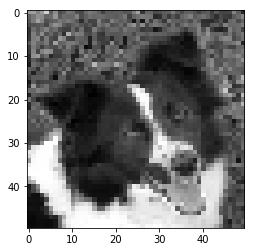

In [80]:
new_image(dir_path)

In [65]:
def preparing_image(path):
    for img in os.listdir(path):
        IMG_SIZE = 50
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # gray_scale because color has not effect
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        Xnew = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
        Xnew = Xnew / 255.0 # Normalizing the features
    return Xnew
        #plt.imshow(new_array, cmap="gray")
        #plt.show()

In [66]:
#preparing_image(dir_path)

In [124]:
def predicting(path):
    predict_new = model.predict(preparing_image(path))
    argmax = np.argmax(predict_new)
    return print('The program has identified the new image as a \033[1m{}'.format(CATEGORIES[argmax].upper()))

In [125]:
predicting(dir_path)

The program has identified the new image as a DOG
